In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [36]:
import pylab
import scipy.stats as stats

### Mahfi Eğilmezin 2016 Ağustos'da şahsi websitesi üzerinden yayınladığı Tüketim Fonksiyonu ve Türkiyede'ki veri seti kullanılmıştır. Veri setindeki sütun bilgileri milyar TL cinsindendir.


In [7]:
df = pd.read_excel("GSYH-Tüketim.xlsx")
df=df.drop(18)
df

,Yıllar,GSYH,GSYH Artış,Özel Tüketim,Tüketim Artışı,Tüketim/GSYH (%)
0,1998,70.2,-,46.7,-,66.5
1,1999,104.6,34.4,71.6,24.9,68.5
2,2000,166.7,62.1,117.5,45.9,70.5
3,2001,240.2,73.5,164.3,46.8,68.4
4,2002,350.5,110.3,238.4,74.1,68.0
5,2003,454.8,104.3,324.0,85.6,71.2
6,2004,559.0,104.2,398.6,74.6,71.3
7,2005,648.9,89.9,465.4,66.8,71.7
8,2006,758.4,109.5,534.8,69.4,70.5
9,2007,843.2,84.8,601.2,66.4,71.3


### Veri seti incelendiğinde regresyon analizi yapmadan önce veri setindeki sütunlar arasındaki korelasyona bakıldığında aşağıdaki korelasyon sonuçları görülür.

In [8]:
df.corr()

,GSYH,Özel Tüketim,Tüketim/GSYH (%)
GSYH,1.000000,0.999591,0.240054
Özel Tüketim,0.999591,1.000000,0.262237
Tüketim/GSYH (%),0.240054,0.262237,1.000000


### GSYH (gelir) ve Özel Tüketim arasında kuvvetli ve pozitif yönlü korelasyon olduğu görülmektedir.Bu ilişki görselleştirildiğinde aşağıdaki sonuç elde edilir.


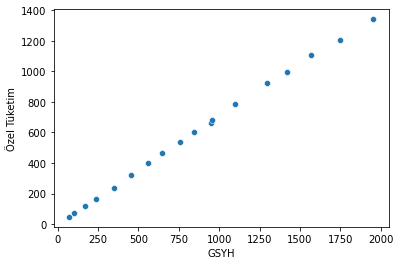

In [9]:
sns.scatterplot(x = df.GSYH, y = df["Özel Tüketim"]);

# Veri seti regresyon modeli öncesinde seçili değişkenlerimizden oluşan model haline getirildiğinde;

In [10]:
X = df.GSYH
y = df["Özel Tüketim"]
# Burada tüketim gelirin bir fonksiyonu olduğundan ve tahmin etmek istenilen değişken(bağımlı değişken) Özel Tüketim olduğundan
# atamalar bu şekilde yapılmıştır.

### Burada iki değişken olduğu için Basit Regresyon Modeli yeterli olacaktır.
### y = β0 + β1X bu regresyon modelinin notasyonudur.
### β0 GSYH 0 olduğunda Tüketimin alacağı değerdir. Yani bağımsız Tüketim harcamaları
### β1 ise bağımlı tüketim harcamalarıdır.

### β0  ve  β1 değerleri hesaplandığında aşağıdaki sonuç bulunur

In [11]:
np.polyfit(X, y, deg=1)

array([0.69622488, 5.46743901])

In [12]:
Rkare = (X.corr(y))**2
Rkare
# Modelin anlamlılık derecesi

0.999181365350487

In [13]:
b1 = np.polyfit(X, y, deg=1)[0]
b0 = np.polyfit(X, y, deg=1)[1]

### Modele dayalı bir tahmin değişkeni oluşturuldu.

In [14]:
tahmin = b1*X + b0 

In [15]:
test = {"Asıl Tüketim ": y, "Tahmin Tüketim": tahmin, "hata":y-tahmin}

In [16]:
df_2 = pd.DataFrame(test)
df_2

,Asıl Tüketim,Tahmin Tüketim,hata
0,46.7,54.342425,-7.642425
1,71.6,78.292561,-6.692561
2,117.5,121.528126,-4.028126
3,164.3,172.700655,-8.400655
4,238.4,249.494259,-11.094259
5,324.0,322.110514,1.889486
6,398.6,394.657146,3.942854
7,465.4,457.247762,8.152238
8,534.8,533.484386,1.315614
9,601.2,592.524256,8.675744


In [18]:
dfmodel = pd.DataFrame({"X":X, "y":y})
dfmodel

,X,y
0,70.2,46.7
1,104.6,71.6
2,166.7,117.5
3,240.2,164.3
4,350.5,238.4
5,454.8,324.0
6,559.0,398.6
7,648.9,465.4
8,758.4,534.8
9,843.2,601.2


### Analiz Tablosu

In [23]:

model = ols( "y ~X", dfmodel).fit()

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.953e+04
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.96e-26
Time:                        15:29:59   Log-Likelihood:                -69.026
No. Observations:                  18   AIC:                             142.1
Df Residuals:                      16   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4674      5.049      1.083      0.2

C:\Users\CASPER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Parametreler iktisat teorisine uygundur. Çünkü tüketim fonksiyonu, Keynes'e göre  makroekonomik düzeydeki harcamaların yani GSYH nin bir fonksiyonudur. Hem modelde hem de veri setinde gelir arttıkça tüketimin artması bu teoriyi desteklemektedir.

#### Hata terimlerinin dağılımları incelendiğinde normal dağılıma uydukları görülmektedir.

<AxesSubplot:xlabel='hata', ylabel='Count'>

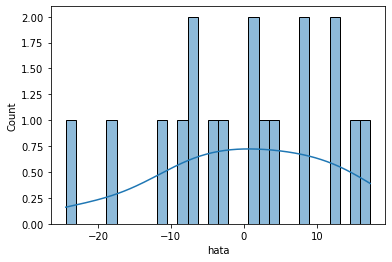

In [32]:
sns.histplot(df_2.hata,kde= True, bins=30)

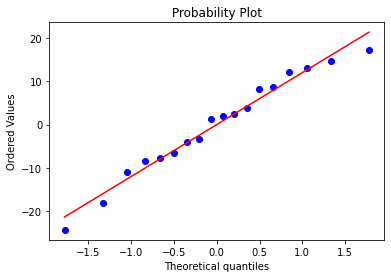

In [38]:
stats.probplot(df_2.hata, dist= "norm", plot= pylab );